**import required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

**import dataset for model**

In [2]:
df = pd.read_csv('../../datasets/motorcycle_local.csv')

pd.set_option('display.max_columns', None)

df.head()

,name,year,seller_type,owner,km_driven,ex_showroom_price,selling_price
0,'Royal Enfield Classic 350',2019,Individual,'1st owner',350,NaN,175000
1,'Honda Dio',2017,Individual,'1st owner',5650,NaN,45000
2,'Royal Enfield Classic Gunmetal Grey',2018,Individual,'1st owner',12000,148114.0,150000
3,'Yamaha Fazer FI V 2.0 [2016-2018]',2015,Individual,'1st owner',23000,89643.0,65000
4,'Yamaha SZ [2013-2014]',2011,Individual,'2nd owner',21000,NaN,20000


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   year               1061 non-null   int64  
 2   seller_type        1061 non-null   object 
 3   owner              1061 non-null   object 
 4   km_driven          1061 non-null   int64  
 5   ex_showroom_price  626 non-null    float64
 6   selling_price      1061 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


(1061, 7)

**set target and features**

In [4]:
df_target = df['selling_price'].astype(float)
df_features = df.drop(columns=['selling_price'])

**one hot encoding**

In [5]:
categorical_columns = df_features.select_dtypes(include=['object']).columns


Encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_values = Encoder.fit_transform(df_features[categorical_columns])


DataFrameEncodedCats = pd.DataFrame(
    encoded_values,
    columns=Encoder.get_feature_names_out(categorical_columns),
    index=df_features.index
)


In [6]:
numericColumns = ['year', 'km_driven', 'ex_showroom_price']

df_numeric = df_features[numericColumns].copy()

df_numeric = df_numeric.fillna(df_numeric.mean())

In [7]:
final_df_features = pd.concat([df_numeric, DataFrameEncodedCats], axis=1)

final_df_features.shape

(1061, 285)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(final_df_features, df_target, test_size=0.2, random_state=42)

In [9]:
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

In [10]:
pred = Model.predict(X_test)

In [11]:
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
R2 = r2_score(y_test, pred)

print("Mean Absolute Error : ", MAE)
print("Mean Squared Error  : ", MSE)
print("R² Score : ", R2)

Mean Absolute Error :  15570.012128841854
Mean Squared Error  :  992146400.8505067
R² Score :  0.6237294509427648


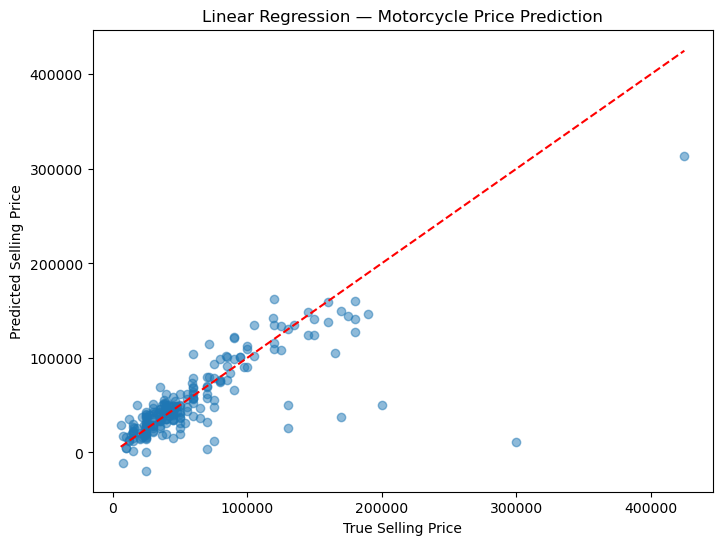

In [12]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Linear Regression — Motorcycle Price Prediction")
plt.show()

In [13]:
DataFrameCoefficients = pd.DataFrame({
    "features" : final_df_features.columns,
    'coefficient' : Model.coef_
}).sort_values(by='coefficient', ascending=False)

In [14]:
DataFrameCoefficients.nlargest(20, 'coefficient')

,features,coefficient
59,name_'Harley-Davidson Street Bob',884206.217534
206,name_'Suzuki GSX S750',800170.380434
279,name_'Yamaha YZF R3',350766.140672
58,name_'Harley-Davidson Street 750',346561.126322
173,name_'Kawasaki Ninja 650 [2018-2019]',343029.413380
172,name_'Kawasaki Ninja 300',296441.972154
189,name_'Royal Enfield Continental GT 650',248977.185973
195,name_'Royal Enfield Interceptor 650',221769.065357
168,name_'KTM RC 390',174243.385165
186,name_'Royal Enfield Classic Signals',158443.327504


In [16]:
DataFrameCoefficients.nsmallest(20, 'coefficient')

,features,coefficient
110,name_'Hero Splender Plus',-20735.604013
18,name_'Bajaj CT 110',-16894.023850
177,name_'Mahindra Rodeo',-16841.200954
154,name_'Honda Navi [2016-2017]',-16769.027570
142,name_'Honda CB twister',-16532.075265
70,name_'Hero Glamour',-16331.595712
61,name_'Hero Ignitor Disc',-16232.354025
20,name_'Bajaj Discover 100 T',-15903.055236
174,name_'Mahindra Flyte',-15266.365752
3,name_'Activa 4g',-15046.849508
